In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing

%matplotlib inline

In [61]:
df = pd.read_csv("covid_19_cases_by_place.csv")

df.head()

,neighborhood_municipality,indv_tested,cases,deaths,update_date
0,Aleppo,612,110,9,2021-04-05
1,Allegheny Center (Pittsburgh),486,98,5,2021-04-05
2,Allegheny West (Pittsburgh),216,28,0,2021-04-05
3,Allentown (Pittsburgh),734,130,0,2021-04-05
4,Arlington (Pittsburgh),537,116,5,2021-04-05


In [62]:
df.isnull().sum()

neighborhood_municipality    0
indv_tested                  0
cases                        0
deaths                       0
update_date                  0
dtype: int64

In [63]:
df = df.drop(columns=['update_date', 'cases'])

In [64]:
df.rename(columns = {'neighborhood_municipality':'Neighborhood', 'indv_tested':'INDV_Tested',
                               'deaths':'Covid Deaths'}, inplace = True)

In [65]:
df.head()

,Neighborhood,INDV_Tested,Covid Deaths
0,Aleppo,612,9
1,Allegheny Center (Pittsburgh),486,5
2,Allegheny West (Pittsburgh),216,0
3,Allentown (Pittsburgh),734,0
4,Arlington (Pittsburgh),537,5


<AxesSubplot:ylabel='Density'>

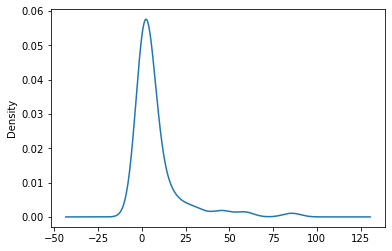

In [66]:
df["Covid Deaths"].plot.density()

In [67]:
df.sort_values('Covid Deaths')

,Neighborhood,INDV_Tested,Covid Deaths
62,Edgewood,1274,0
26,Bradford Woods,397,0
67,Emsworth,990,0
199,Undefined (Pittsburgh),19,0
91,Haysville,19,0
...,...,...,...
125,Mount Lebanon,12361,59
144,Penn Hills,13201,60
116,McCandless,9589,85
162,Ross,10726,85


In [68]:
#Drop undefined Neighborhoods
df = df.drop([199])

In [69]:
df = df.sort_values(by=['Covid Deaths'],axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last',ignore_index=False,key=None).head(10)
df.sort_values(by=['INDV_Tested'], ascending=False)

,Neighborhood,INDV_Tested,Covid Deaths
35,Central Business District (Pittsburgh),2689,0
38,Central Oakland (Pittsburgh),2236,0
188,Strip District (Pittsburgh),894,0
182,Springdale Township,517,0
57,East Deer,465,0
179,Spring Garden (Pittsburgh),227,0
40,Chartiers City (Pittsburgh),154,0
128,Mt. Oliver (Pittsburgh),121,0
163,Rosslyn Farms,120,0
185,St. Clair (Pittsburgh),52,0


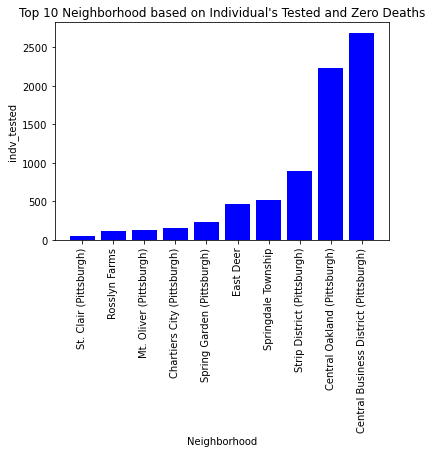

In [70]:
df = df.sort_values(by=['INDV_Tested'],axis=0,ascending=True,inplace=False,kind='quicksort',na_position='last',ignore_index=False,key=None).head(10)
plt.bar("Neighborhood", "INDV_Tested", data=df, color="blue")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.ylabel("indv_tested")
plt.title("Top 10 Neighborhood based on Individual's Tested and Zero Deaths")
plt.show()